In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [3]:
house = fetch_california_housing()

In [4]:
data = pd.DataFrame(house.data, columns=house.feature_names)

In [5]:
data["target"] = house.target

In [6]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
print("Shape = ",data.shape)

Shape =  (20640, 9)


In [8]:
print("Checking the dupliactes values = ",data.duplicated().sum())
print("--"*50)
print("Checking the Null values = ",data.isnull().sum())

Checking the dupliactes values =  0
----------------------------------------------------------------------------------------------------
Checking the Null values =  MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [9]:
print("Checking the info = ",data.info())
print("--"*50)
print("Checking the detail = ",data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Checking the info =  None
----------------------------------------------------------------------------------------------------
Checking the detail =               MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.8

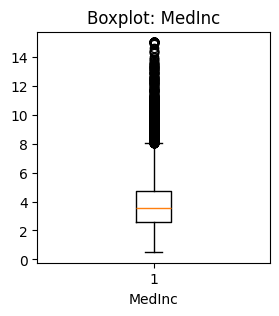

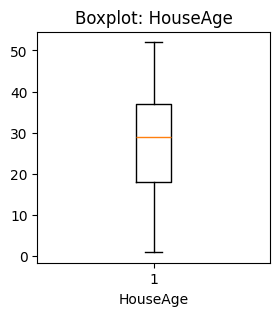

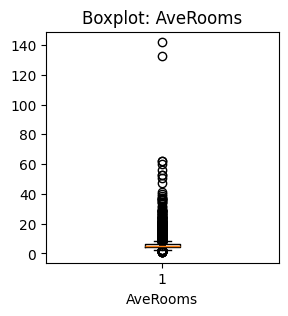

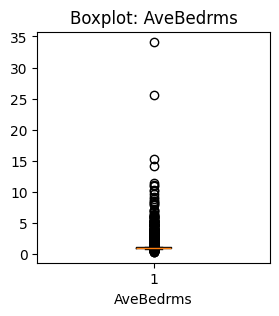

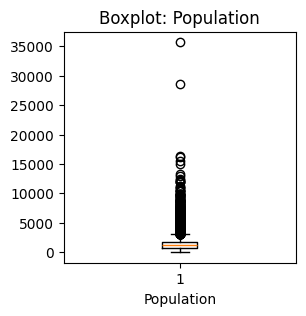

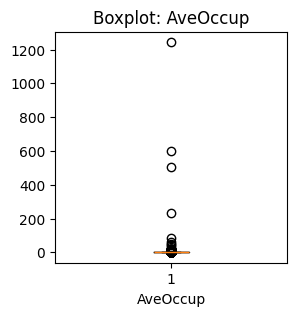

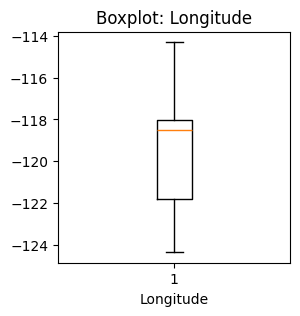

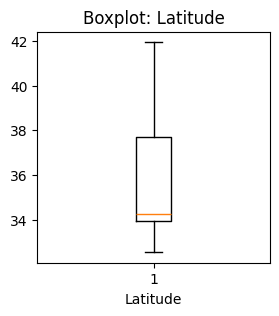

In [10]:
# checking the Outliers

cols = ["MedInc","HouseAge","AveRooms","AveBedrms"	,"Population","AveOccup","Longitude","Latitude"]

def plot_boxplots(data, col_list):
    for col in col_list:
        plt.figure(figsize=(3,3))
        plt.boxplot(data[col], vert=True)
        plt.title(f'Boxplot: {col}')
        plt.xlabel(col)
        plt.grid(False)
        plt.show()

plot_boxplots(data, cols)

# FEATURE ENGINEERING

In [11]:
# removing outliers

col = [	"MedInc","AveRooms","AveBedrms"	,"Population","AveOccup"]

def remove_outliers_and_plot(data, col_list):
    # Make a copy of the data to avoid modifying original
    data_clean = data.copy()

    for col in col_list:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data to remove outliers
        data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]
    return data_clean



cleaned_data1 = remove_outliers_and_plot(data, col)
cleaned_data2 = remove_outliers_and_plot(cleaned_data1,col)
cleaned_data3 = remove_outliers_and_plot(cleaned_data2,col)
cleaned_data4 = remove_outliers_and_plot(cleaned_data3,col)
cleaned_data5 = remove_outliers_and_plot(cleaned_data4,col)

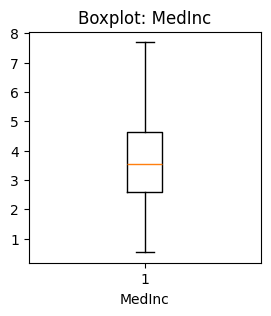

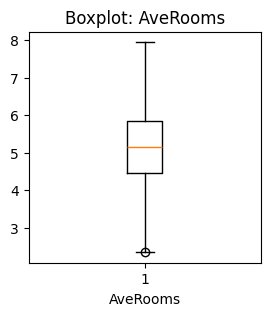

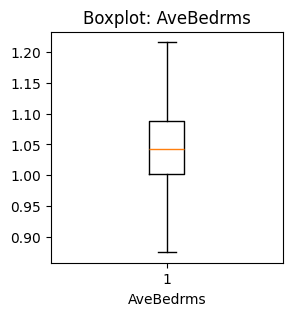

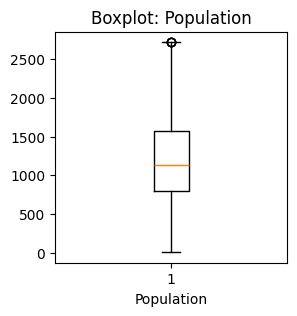

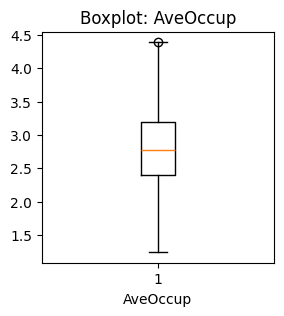

In [12]:
# box plot after removing outliers

def plot_boxplots(data, col_list):
    for col in col_list:
        plt.figure(figsize=(3,3))
        plt.boxplot(data[col], vert=True)
        plt.title(f'Boxplot: {col}')
        plt.xlabel(col)
        plt.grid(False)
        plt.show()

plot_boxplots(cleaned_data5, col)


# MACHINE LEARNING

In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [44]:
x = cleaned_data5.drop("target",axis=1)
y = cleaned_data5["target"]


X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),   # You can tune alpha
    "Lasso Regression": Lasso(alpha=0.1)    # You can tune alpha
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"🔹 {name}")
    print(f"   Mean Squared Error (MSE): {mse:.4f}")
    print(f"   R² Score: {r2:.4f}")
    print("-" * 40)

🔹 Linear Regression
   Mean Squared Error (MSE): 0.4268
   R² Score: 0.6223
----------------------------------------
🔹 Ridge Regression
   Mean Squared Error (MSE): 0.4268
   R² Score: 0.6223
----------------------------------------
🔹 Lasso Regression
   Mean Squared Error (MSE): 0.5361
   R² Score: 0.5255
----------------------------------------


# Saving the model

In [45]:
import pickle

In [46]:
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)